In [106]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)

# Chapter 2

### Problem 2.1: Use the Taylor's Series expansion method to derive a second-order accurate central difference approximation for $\frac{\partial u}{\partial x}$

Consider a Taylor series expansion of $\frac{\partial u}{\partial x}$ about the space point $x_i$ to the space point $x_i + \Delta x_i$, keeping time fixed at $t_n$:
$$
u(x_i + \Delta x) = u \bigg|_{x_i,t_n} + 
                    \Delta x \cdot \frac{\partial u}{\partial x} \bigg|_{x_i,t_n} + 
                    \frac{(\Delta x)^2}{2} \cdot \frac{\partial^2 u}{\partial x^2} \bigg|_{x_i,t_n} +
                    \frac{(\Delta x)^3}{6} \cdot \frac{\partial^3 u}{\partial x^3} \bigg|_{\xi_1,t_n}
$$
where $\xi_1$ is a space point located somewhere on the interval $(x_i, x_i + \Delta x_i)$. Similarly, the taylor series expansion about point $x_i$ to the point $x_i - \Delta x_i$, again keeping time fixed at $t_n$:
$$
u(x_i - \Delta x) \bigg|_{t_n} = u \bigg|_{x_i,t_n} -
                    \Delta x \cdot \frac{\partial u}{\partial x} \bigg|_{x_i,t_n} +
                    \frac{(\Delta x)^2}{2} \cdot \frac{\partial^2 u}{\partial x^2} \bigg|_{x_i,t_n} -
                    \frac{(\Delta x)^3}{6} \cdot \frac{\partial^3 u}{\partial x^3} \bigg|_{\xi_2,t_n}
$$
where $\xi_2$ is a space point located somewhere on the interval $(x_i, x_i - \Delta x_i)$. Taking the difference of these two equations gives:
$$
[u(x_i + \Delta x) - u(x_i - \Delta x)]_{t_n} = 2 \Delta x \cdot \frac{\partial u}{\partial x} \bigg|_{x_i,t_n} + 
                                                \frac{(\Delta x)^3}{3} \cdot \frac{\partial^3 u}{\partial x^3} \bigg|_{\xi_3,t_n}
$$
where $\xi_3$ is, from the mean value theorem, on the interval $(x_i - \Delta x, x_i + \Delta x)$.

Rearranging terms, we have:
$$
\frac{\partial u}{\partial x} \bigg|_{x_i,t_n} = \left[\frac{u(x_i + \Delta x) - u(x_i - \Delta x)}{2 \Delta x} \right]_{t_n} -
                                                 \mathcal{O}[(\Delta x)^2]
$$

### Problem 2.2: Repeat Problem 2.1, but now derive a fourth order accurate central difference approximation for $\frac{\partial u}{\partial x}$.

Consider a Taylor series expansion of $\frac{\partial u}{\partial x}$ about the space point $x_i$ to the space point $x_i + \Delta x_i$, keeping time fixed at $t_n$:

$$
u(x_i + \Delta x) = u \bigg|_{x_i,t_n} + 
                    \Delta x \cdot \frac{\partial u}{\partial x} \bigg|_{x_i,t_n} + 
                    \frac{(\Delta x)^2}{2} \cdot \frac{\partial^2 u}{\partial x^2} \bigg|_{x_i,t_n} +
                    \frac{(\Delta x)^3}{6} \cdot \frac{\partial^3 u}{\partial x^3} \bigg|_{x_i,t_n} +
                    \frac{(\Delta x)^4}{24} \cdot \frac{\partial^4 u}{\partial x^4} \bigg|_{x_i,t_n} +
                    \frac{(\Delta x)^5}{120} \cdot \frac{\partial^5 u}{\partial x^5} \bigg|_{\xi_1,t_n}
$$

where $\xi_1$ is a space point located somewhere on the interval $(x_i, x_i + \Delta x_i)$. Similarly, the taylor series expansion about point $x_i$ to the point $x_i - \Delta x_i$, again keeping time fixed at $t_n$:
$$
u(x_i - \Delta x) = u \bigg|_{x_i,t_n} - 
                    \Delta x \cdot \frac{\partial u}{\partial x} \bigg|_{x_i,t_n} + 
                    \frac{(\Delta x)^2}{2} \cdot \frac{\partial^2 u}{\partial x^2} \bigg|_{x_i,t_n} -
                    \frac{(\Delta x)^3}{6} \cdot \frac{\partial^3 u}{\partial x^3} \bigg|_{x_i,t_n} +
                    \frac{(\Delta x)^4}{24} \cdot \frac{\partial^4 u}{\partial x^4} \bigg|_{x_i,t_n} -
                    \frac{(\Delta x)^5}{120} \cdot \frac{\partial^5 u}{\partial x^5} \bigg|_{\xi_2,t_n}
$$
where $\xi_2$ is a space point located somewhere on the interval $(x_i, x_i - \Delta x_i)$. Taking the difference of these two equations gives:
$$
[u(x_i + \Delta x) - u(x_i - \Delta x)]_{t_n} = 2 \Delta x \cdot \frac{\partial u}{\partial x} \bigg|_{x_i,t_n} + 
                                                \frac{(\Delta x)^3}{3} \cdot \frac{\partial^3 u}{\partial x^3} \bigg|_{x_i,t_n} - \frac{(\Delta x)^5}{60} \cdot \frac{\partial^5 u}{\partial x^5} \bigg|_{\xi_3,t_n}
$$
where $\xi_3$ is, from the mean value theorem, on the interval $(x_i - \Delta x, x_i + \Delta x)$.

Rearranging terms, we have:
$$
\frac{\partial u}{\partial x} \bigg|_{x_i,t_n} = \left[\frac{u(x_i + \Delta x) - u(x_i - \Delta x)}{2 \Delta x} \right]_{t_n} -
                                                 \frac{(\Delta x)^2}{6} \cdot \frac{\partial^3 u}{\partial x^3} \bigg|_{x_i,t_n} +
                                                 \mathcal{O}[(\Delta x)^4]
$$

### Problem 2.3: Replicate the graphical results of Fig. 2.1.

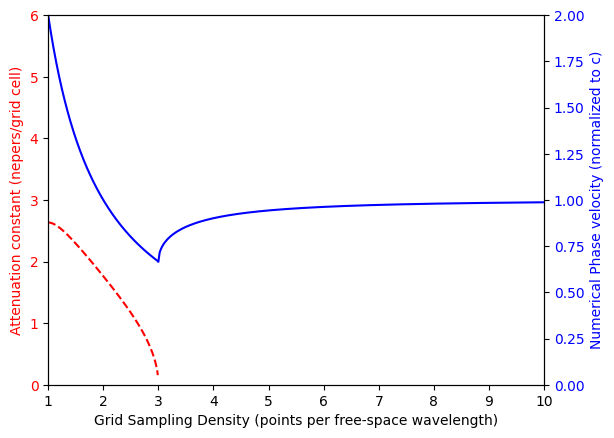

<Figure size 640x480 with 0 Axes>

In [58]:
# Courant stability factor
S = 0.5

# Grid Sampling Density transition point
N_transition = (2*np.pi*S)/(np.arccos(1-2*S**2))

# Grid Sampling Density
GSD_1 = np.linspace(1,N_transition,200,endpoint=False)
GSD_2 = np.linspace(N_transition+0.00000001,10,300)

zeta = lambda S, N: 1 + (1/S)**2*(np.cos(2*np.pi*S/N)-1)

# Attenuation Constant
zeta = lambda S, N: 1 + (1/S)**2*(np.cos(2*np.pi*S/N)-1)
att_const_func = lambda S,N: -np.log(-zeta(S,N)-np.sqrt(zeta(S,N)**2-1))

# Normalized numerical phase velocity
# N < 3

vp_1 = 2/GSD_1

# N >= 3

vp_2 = (2*np.pi) / (GSD_2*np.arccos(1+(1/S)**2*(np.cos(2*np.pi*S/GSD_2)-1)))

# Plotting

fig, ax1 = plt.subplots()

color = 'red'
linestyle = '--'
ax1.set_xlabel('Grid Sampling Density (points per free-space wavelength)')
ax1.set_ylabel('Attenuation constant (nepers/grid cell)', color=color)
ax1.plot(GSD_1, att_const_func(S,GSD_1),color=color, linestyle=linestyle)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xlim(1,10)
ax1.set_ylim(0,6)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'blue'
linestyle = 'solid'
ax2.set_ylabel('Numerical Phase velocity (normalized to c)', color=color)  # we already handled the x-label with ax1
ax2.plot(GSD_1, vp_1,color=color,linestyle=linestyle)
ax2.plot(GSD_2, vp_2,color=color,linestyle=linestyle)
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylim(0,2)

plt.show()
plt.tight_layout()

### Problem 2.4: Develop graphical results similar to those of Fig. 2.1, but for a Courant stability factor $S = 1 / \sqrt{2}$

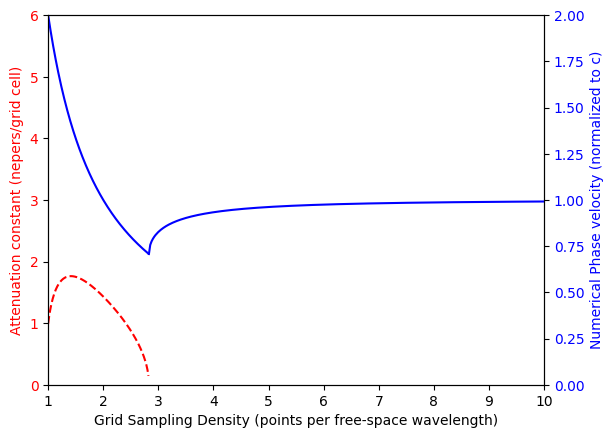

<Figure size 640x480 with 0 Axes>

In [61]:
# Courant stability factor
S = 1/np.sqrt(2)

# Grid Sampling Density transition point
N_transition = (2*np.pi*S)/(np.arccos(1-2*S**2))

# Grid Sampling Density
GSD_1 = np.linspace(1,N_transition,200,endpoint=False)
GSD_2 = np.linspace(N_transition+0.00000001,10,300)

zeta = lambda S, N: 1 + (1/S)**2*(np.cos(2*np.pi*S/N)-1)

# Attenuation Constant
zeta = lambda S, N: 1 + (1/S)**2*(np.cos(2*np.pi*S/N)-1)
att_const_func = lambda S,N: -np.log(-zeta(S,N)-np.sqrt(zeta(S,N)**2-1))

# Normalized numerical phase velocity
# N < N_transition

vp_1 = 2/GSD_1

# N >= 3

vp_2 = (2*np.pi) / (GSD_2*np.arccos(1+(1/S)**2*(np.cos(2*np.pi*S/GSD_2)-1)))

# Plotting

fig, ax1 = plt.subplots()

color = 'red'
linestyle = '--'
ax1.set_xlabel('Grid Sampling Density (points per free-space wavelength)')
ax1.set_ylabel('Attenuation constant (nepers/grid cell)', color=color)
ax1.plot(GSD_1, att_const_func(S,GSD_1),color=color, linestyle=linestyle)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xlim(1,10)
ax1.set_ylim(0,6)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'blue'
linestyle = 'solid'
ax2.set_ylabel('Numerical Phase velocity (normalized to c)', color=color)  # we already handled the x-label with ax1
ax2.plot(GSD_1, vp_1,color=color,linestyle=linestyle)
ax2.plot(GSD_2, vp_2,color=color,linestyle=linestyle)
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylim(0,2)

plt.show()
plt.tight_layout()

### Problem 2.5: Replicate the graphical results of Fig. 2.2

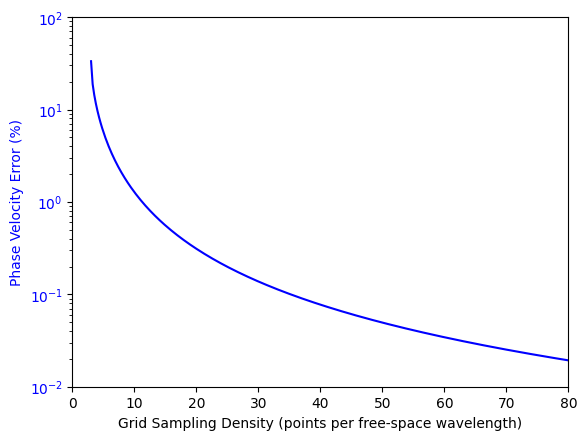

<Figure size 640x480 with 0 Axes>

In [64]:
# Courant stability factor
S = 0.5

# Grid Sampling Density transition point
N_transition = (2*np.pi*S)/(np.arccos(1-2*S**2))

# Grid Sampling Density
GSD = np.linspace(N_transition+0.00000001,80,300)

vp = 100*(1-(2*np.pi) / (GSD*np.arccos(1+(1/S)**2*(np.cos(2*np.pi*S/GSD)-1))))

# Plotting

fig, ax1 = plt.subplots()

color = 'blue'
linestyle = 'solid'
ax1.set_xlabel('Grid Sampling Density (points per free-space wavelength)')
ax1.set_ylabel('Phase Velocity Error (%)', color=color)
ax1.plot(GSD, vp,color=color, linestyle=linestyle)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

ax1.set_xlim(0,80)
ax1.set_ylim(0.01,100)

plt.show()
plt.tight_layout()

### Problem 2.6: Develop graphical results similar to those of Fig. 2.2, but for a Courant stability factor $S = 1 / \sqrt{2}$.

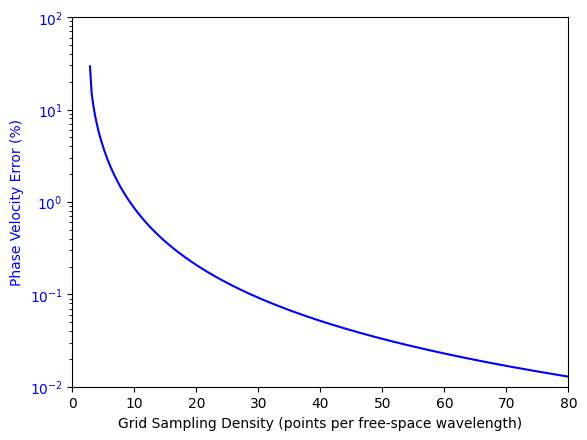

<Figure size 640x480 with 0 Axes>

In [65]:
# Courant stability factor
S = 1/np.sqrt(2)

# Grid Sampling Density transition point
N_transition = (2*np.pi*S)/(np.arccos(1-2*S**2))

# Grid Sampling Density
GSD = np.linspace(N_transition+0.00000001,80,300)

vp = 100*(1-(2*np.pi) / (GSD*np.arccos(1+(1/S)**2*(np.cos(2*np.pi*S/GSD)-1))))

# Plotting

fig, ax1 = plt.subplots()

color = 'blue'
linestyle = 'solid'
ax1.set_xlabel('Grid Sampling Density (points per free-space wavelength)')
ax1.set_ylabel('Phase Velocity Error (%)', color=color)
ax1.plot(GSD, vp,color=color, linestyle=linestyle)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

ax1.set_xlim(0,80)
ax1.set_ylim(0.01,100)

plt.show()
plt.tight_layout()

### Problem 2.7: Consider the numerical dispersion relation for the second-order-accurate finite-difference solution to the one-dimensional scalar wave equation for free-space.

##### a) Calculate and graph $\tilde{v}_p / c$, the numerical phase velocity normalized to the free-space speed of light, as a function of the grid sampling density for $N_\lambda |_{transition} \leq N_\lambda \leq 10$ assuming stability factors S = 0.7, 0.8, 0.9, and 0.99.

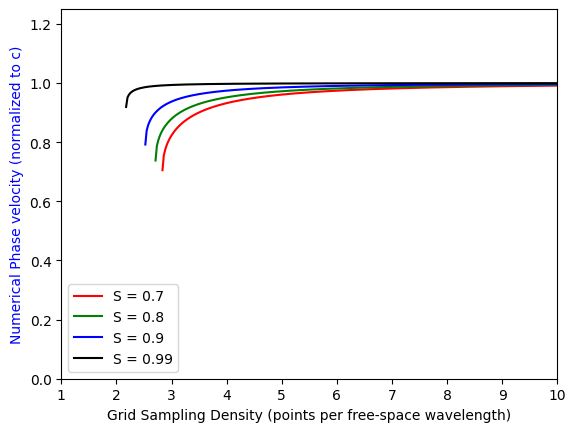

<Figure size 640x480 with 0 Axes>

In [76]:
# Courant stability factor
S = np.array([0.7, 0.8, 0.9, 0.99])

# Grid Sampling Density transition point
N_transition = (2*np.pi*S)/(np.arccos(1-2*S**2))

# Grid Sampling Density
GSD = np.linspace(N_transition+0.00000001,10,300)

# N >= N_Transition

vp = (2*np.pi) / (GSD*np.arccos(1+(1/S)**2*(np.cos(2*np.pi*S/GSD)-1)))

# Plotting

fig, ax1 = plt.subplots()

colors = ['red','green','blue', 'black']
linestyle = 'solid'
ax1.set_xlabel('Grid Sampling Density (points per free-space wavelength)')
ax1.set_ylabel('Numerical Phase velocity (normalized to c)', color=color)
for i,_ in enumerate(S):
    ax1.plot(GSD[:,i], vp[:,i],color=colors[i], linestyle=linestyle, label="S = " + str(S[i]))

ax1.legend()
ax1.set_xlim(1,10)
ax1.set_ylim(0,1.25)

plt.show()
plt.tight_layout()

##### b) Calculate and graph the percent numerical phase-velocity error relative to the free-space speed of light as a function of the grid sampling density for  $N_\lambda |_{transition} \leq N_\lambda \leq 100$ assuming stability factors $S$ = 0.7, 0.8, 0.9, and 0.99. Use a logarithmic scale for the error axis.

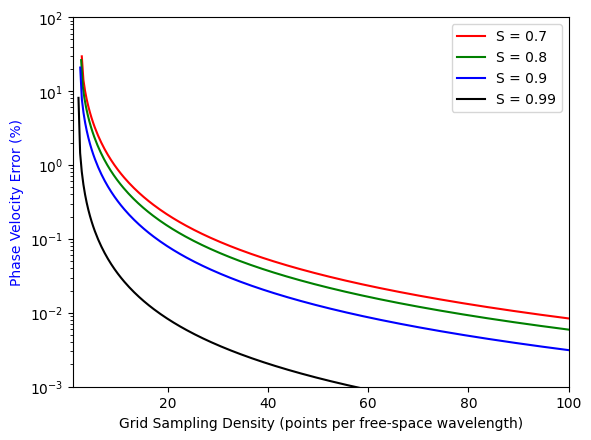

<Figure size 640x480 with 0 Axes>

In [107]:
# Courant stability factor
S = np.array([0.7, 0.8, 0.9, 0.99])

# Grid Sampling Density transition point
N_transition = (2*np.pi*S)/(np.arccos(1-2*S**2))

# Grid Sampling Density
GSD = np.linspace(N_transition+0.00000001,100,300)

# N >= N_Transition

vp_error = 100*(1-(2*np.pi) / (GSD*np.arccos(1+(1/S)**2*(np.cos(2*np.pi*S/GSD)-1))))

# Plotting

fig, ax1 = plt.subplots()

colors = ['red','green','blue', 'black']
linestyle = 'solid'
ax1.set_xlabel('Grid Sampling Density (points per free-space wavelength)')
ax1.set_ylabel('Phase Velocity Error (%)', color=color)
for i,_ in enumerate(S):
    ax1.plot(GSD[:,i], vp_error[:,i],color=colors[i], linestyle=linestyle, label="S = " + str(S[i]))

ax1.legend()
ax1.set_xlim(1,100)
ax1.set_ylim(0.001,100)
ax1.set_yscale('log')

plt.show()
plt.tight_layout()

##### c) What grid sampling density is needed to suppress the numerical phase-velocity errors to less than 0.1% for a stability factor $S$ = 0.9?

In [98]:
# Courant stability factor
S = 0.9

# Grid Sampling Density transition point
N_transition = (2*np.pi*S)/(np.arccos(1-2*S**2))

# Grid Sampling Density
GSD = np.linspace(N_transition+0.00000001,100,1000000)

# N >= N_Transition

vp_error = 100*(1-(2*np.pi) / (GSD*np.arccos(1+(1/S)**2*(np.cos(2*np.pi*S/GSD)-1))))

min_value_index = np.argmin(np.abs(vp_error-0.1))
print(GSD[min_value_index])

17.784055764421556


The phase velocity error (%) is expressed as: 
$$
PVE = 100\left(1-\frac{2\pi}{N_\lambda \cos^{-1}[1+(\frac{1}{S})^2[\cos{(2 \pi S / N_\lambda)}-1]]}\right)
$$

Using a numerical solution, $N_\lambda$ must be $\approx 17.784$ to suppress the numerical phase-velocity errors to less than 0.1% for a stability factor $S$ = 0.9.

### Problem 2.8: Write a computer program that implements the solution of the one-dimensional scalar wave equation discussed in this chapter. To source a wave, specify $u_0^n$ at the left boundary of the grid. Test your program by replicating the graphical results of Figs. 2.3(a,b).

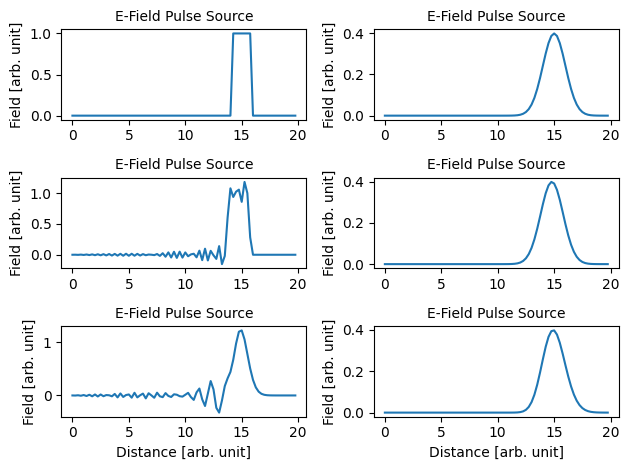

In [108]:
deltaX = 0.25
gamma = [1, 0.99]
sigma = 1
time = 20*sigma
domainSize = 200
c = 1
t0 = 5*sigma
# end User defined values

def pulse(t,t0,sigma):
    ''' This function creates a square pulse to propagate in computational domain'''
    if abs(t-t0) < sigma:
        return 1
    else:
        return 0
 
fig, ax1 = plt.subplots(1,1) 
domain = deltaX * np.arange(0,domainSize + 1)
for g in range(len(gamma)):
    deltaT = gamma[g]*deltaX/c
    timeSteps = int(time/deltaT)
 
    u = np.zeros(domainSize + 1)

    for i in range(timeSteps):
        u[0] = pulse(i*deltaT,t0,sigma)
        for j in range(1,domainSize):
            u[j] = H[j] + (deltaT/deltaX)*(E[j+1]-E[j])
    
    axs[g,0].plot(domain[0:80], E[0:80])
    axs[g,0].set_title('E-Field Pulse Source',fontsize=10)
    if g == 2:
        axs[g,0].set_xlabel('Distance [arb. unit]',fontsize=10)
    axs[g,0].set_ylabel('Field [arb. unit]',fontsize=10)
    # axs[g,0].legend([r'$\gamma = {}$'.format(gamma[g])], handlelength = 0)

fig.tight_layout()

#### Problem 2.9: Use the scalar-wave-equaiton computer program developed in Problem 2.8 to replicate the graphical results of Figs. 2.4(a,b).

#### Problem 2.10: Use the scalar-wave-equaiton computer program developed in Problem 2.8 to replicate the graphical results of Figs. 2.5.

#### Problem 2.11: Use the scalar-wave-equaiton computer program developed in Problem 2.8 to replicate the graphical results of Figs. 2.6(a,b).

#### Problem 2.12: Use the scalar-wave-equaiton computer program developed in Problem 2.8 to replicate the graphical results of Figs. 2.7(a,b).